# Poissonian spike trains

We consider that neurons emit spikes randomly - we will therefore implement a model that creates artificial, random spike trains. As seen during the tutorial, we can use a Poisson Process $\{N(t) | t \in \mathbb{R} \}$ to model this phenomena. The probability of observing $n$ spikes during a duration $T$ is
$$ \mathbb{P}(N(T)=n) = \frac{(\lambda T)^n}{n!} e^{-\lambda T}, \text{ with $\lambda$ the mean rate of spike occurences.} $$
Within a small time bin $\Delta T$, the probability of a spike $X \in \{0,1\}$ occuring follows a Binomial distribution $X \sim \mathcal{B}(\lambda \Delta T).$

We begin by importing the necessary libraries:

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import random as rand
from scipy.stats import poisson
import warnings
warnings.filterwarnings('ignore')

plt.logging.getLogger('matplotlib.font_manager').disabled = True

c = colors = plt.cm.plasma(np.linspace(0,1,6))

plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=14)     # fontsize of the axes labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize
plt.rc('figure', titlesize=16)   # fontsize of the figure title
plt.rc('lines', linewidth=2)     # linewidths of all plots set to 2

%matplotlib inline

And defining the colourset for the plots:

In [4]:
def RGB_gradient(color1, color2,steps):
    output = []
    r, g, b = color1[0], color1[1], color1[2]
    rdelta, gdelta, bdelta = (color2[0]-color1[0])/steps, (color2[1]-color1[1])/steps, (color2[2]-color1[2])/steps
    for step in range(steps):
        r += rdelta
        g += gdelta
        b += bdelta
        output.append((abs(r), abs(g), abs(b)))
    return output

red, blue, green, purple = (235/255,60/255,94/255),(86/255,204/255,242/255),(111/255,207/255,151/255),(182/255,111/255,207/255)
yellow, orange, rose = (255/255,223/255,107/255),(249/255,146/255,27/255),(249/255,159/255,238/255)

## Generating random spikes

We consider a neuron spiking with an average rate of $\lambda = 25$ spikes per second. We set the time bin $\Delta T = 2$ms. This means that we have on average $0.05$ spikes per $2$ms. The following code generates the raster plot of this neuron over the time course of $T=1$s.

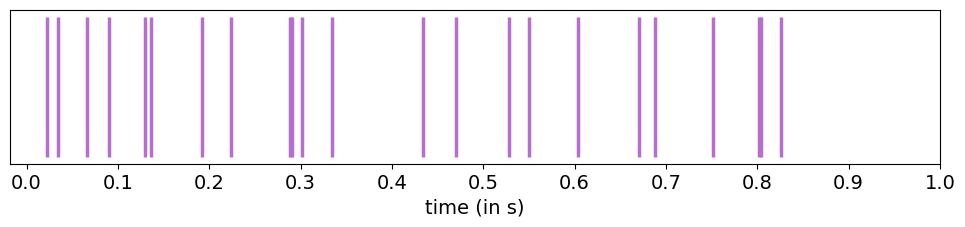

In [4]:
# We create an empty array that will store the spike events over 1000ms = 1s
spiketimes = np.zeros(1000)

# We descritise the time into M time bins of length 2ms
M = int(len(spiketimes)/2)

for k in range(M) :
    if rand.random() < 0.05 : #___
        spiketimes[2*k] = 1 #___

# Raster plot parameters
plt.figure(figsize=(12,2))
plt.eventplot(np.where(spiketimes > 0), orientation='horizontal', color=purple, linewidths=2.5) #___

plt.ylim(.45,1.55)
plt.yticks([])

plt.xticks([k*100 for k in range(11)], [k*100/1000 for k in range(11)])
plt.xlabel('time (in s)')

plt.show()

We now run the previous simulation over $1000$ trials and plot the first $10$ trials as a raster plot. We will keep track of the number of neurons that spiked during each trial as well as all the ISI.

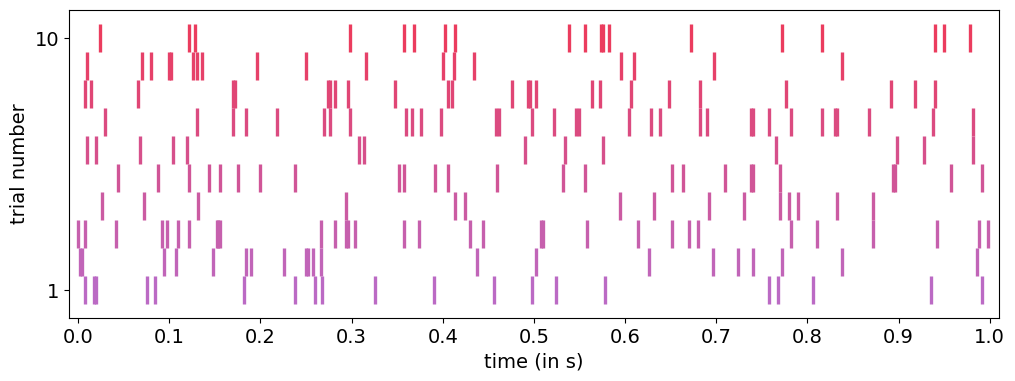

In [5]:
col = RGB_gradient(purple, red, 50)
plt.figure(figsize=(12,4))
N = 2000
Time = 1000
M = int(Time/2)

data = []
time_intervals = []
for s in range(N) :
    spiketimes = np.zeros(Time)
    time_last_spike = 0
    for k in range(M) :
        if rand.random() < 0.05 : #___
            spiketimes[2*k] = 1 #___
            time_intervals += [2*k-time_last_spike] #___
            time_last_spike = k*2 #___
    data += [np.where(spiketimes > 0)[0]] #___

# We plot a raster plot of the first 10 trials
plt.eventplot(data[:10], colors=RGB_gradient(purple,red,10), linewidths=2.4) #___

# Raster plot parameters
plt.xticks([k*100 for k in range(11)], [k/10 for k in range(11)])
plt.yticks([0,9,19,29,39,49],[1,10,20,30,40,50])
plt.ylim(-1,10)
plt.xlim(-10,1010)
plt.xlabel('time (in s)')
plt.ylabel('trial number')
plt.show()

We then plot these results in the form of a histogram. This will allow us to compare with the probability mass function (PMF) of a Poisson distribution of parameter $\lambda T$, with $\lambda=25$ and $T=1$s.

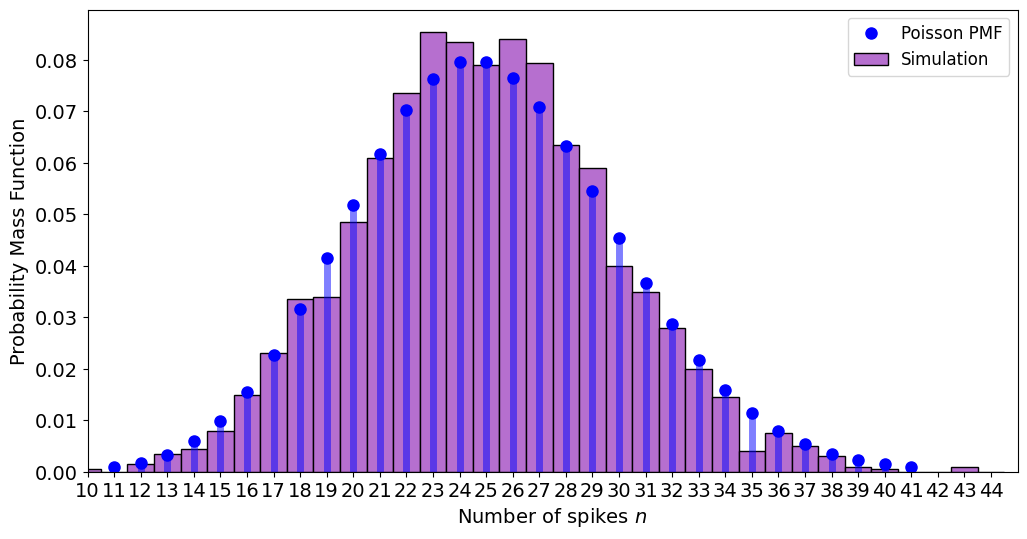

In [16]:
count = []
for el in data :
    count += [len(el)]

count = np.array(count)
plt.figure(figsize=(12,6))

# Computing the histogram
lb, ub = min(count)-2, max(count)+2
num_bins = ub-lb
hist, bin_edges = np.histogram(count, bins=num_bins, range=(lb, ub), density=True)
width = (bin_edges[1] - bin_edges[0])

# Plotting the spike count histogram
plt.bar(bin_edges[:-1], hist, align='center', width=width, edgecolor='k', color=purple, label='Simulation')
plt.xticks(range(lb,ub))
plt.xlim([lb-width/2, ub-width/2])

# Generation of Poisson PMF using scipy.stats
mu = 25
x = np.arange(poisson.ppf(0.001, mu), poisson.ppf(0.999, mu))
plt.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='Poisson PMF')
plt.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5, label=None)

plt.xlabel('Number of spikes $n$')
plt.ylabel('Probability Mass Function')
plt.xlim(10, 45)
plt.legend()
plt.show()

Finally, we make sure the simulated ISIs follow an exponantial distribution by comparing it to the probability density function of an exponantial distribution of parameter $\lambda$. 

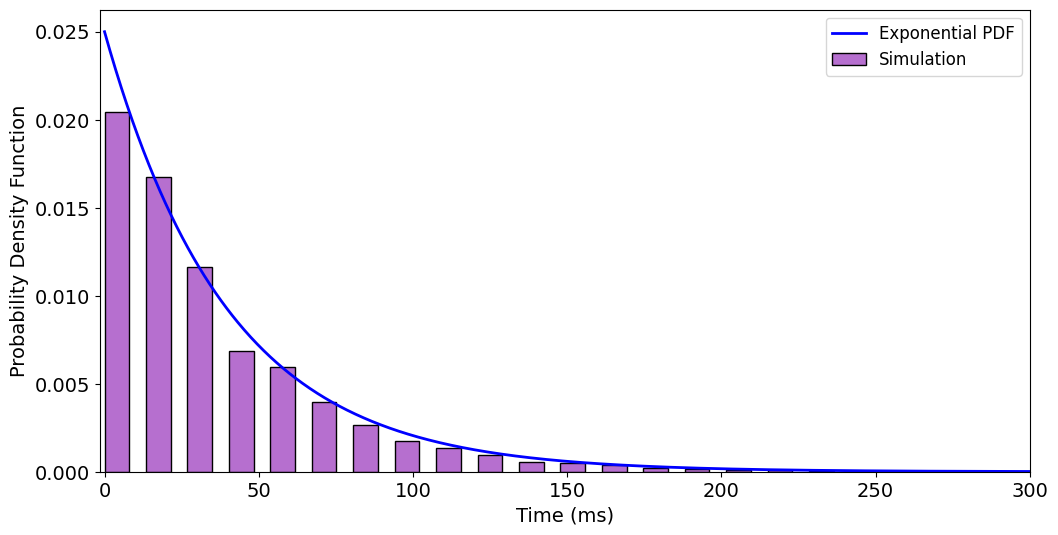

In [14]:
plt.figure(figsize=(12,6))
lb, ub = np.amin(time_intervals), np.amax(time_intervals)
hist, bin_edges = np.histogram(time_intervals, bins=32, range=(lb, ub), density=True)

# Plotting ISI histogram
plt.bar(bin_edges[:-1], hist, align='edge', width=8, edgecolor='k', color=purple, label='Simulation')
plt.xlim([(lb-width/2)-1, 300])

# Generation of exponential PDF
t = np.linspace(0,300,1001)
y = 0.025*np.exp(-0.025*t)
plt.plot(t,y, linewidth=2, color='blue', label="Exponential PDF")

plt.ylabel('Probability Density Function')
plt.xlabel('Time (ms)')

plt.legend()
plt.show()

# Stochastic LIF

We model a LIF neuron receiving noisy input such that
$$ \frac{dV(t)}{dt} = E_l - V(t) + \mu + \sigma \eta(t),$$
where $\eta(t)$ is a reduced centred white noise as seen during the tutorial. 

Using the explanations provided in the tutorial on how to numerically implement a stochastic ODE, the following code simulates a LIF neuron receiving noisy input.

In [14]:
# Noisy LIF using Euler's method
def integrate_and_fire_noisy(V0, time_steps, mu, sigma, threshold):
    # Initial conditions
    V = [V0]
    t = [0]
    for i in range(time_steps) :
        if V[-1] >= threshold :
            V.append(V0) 
            t.append(i)
        V.append(V[-1] + (EL-V[-1]+mu)*dt + sigma*np.sqrt(dt)*np.random.standard_normal()) #___
        t.append(i)
    return np.array(t), np.array(V)

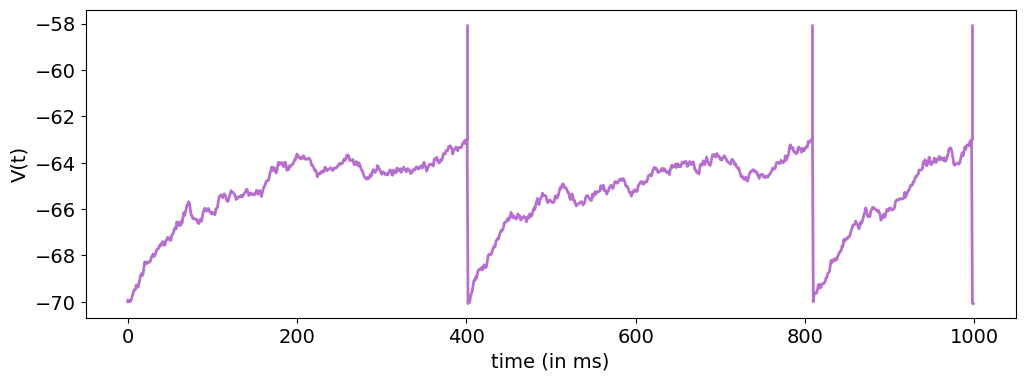

In [20]:
# Constants
dt = 0.01
EL = -70
Vth = -63

# Assigning the variables
x, y = integrate_and_fire_noisy(-70, 1000, 7, 1, Vth)

# Plots the neuron's voltage
plt.figure(figsize=(12,4))
plt.plot(x, y, color=purple)

# Plots the spike
spikes = x[np.where(y >= Vth)[0]]
plt.vlines(x = spikes, ymin = Vth, ymax = -58, color = purple, linewidth = 2)

plt.xlabel('time (in ms)')
plt.ylabel('V(t)')
plt.show()